In [ ]:
# connect snowflake --> Run only once
pip install --upgrade snowflake-connector-python
pip install "snowflake-connector-python[secure-local-storage,pandas]"

In [1]:
# import libraries
import snowflake.connector
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Snowflake Credentials
conn = snowflake.connector.connect( user = "DATAANALYST2408891",
         password = "P@$$w0rd@123",
         account = "xf59376.ap-southeast-1",
         warehouse = "COMPUTE_WH",
         database = "NETFLIX",
         schema = "PUBLIC")

## First Table MASTER_NETFLIX

In [3]:
# Fetch data from public.master_netflix (snowflake) in pandas dataframe 
curs = conn.cursor()
curs.execute("USE ROLE ACCOUNTADMIN")
sql_master_netflix = 'SELECT * FROM "PUBLIC"."MASTER_NETFLIX"'
curs.execute(sql_master_netflix)
master_netflix = curs.fetch_pandas_all()

In [4]:
# check dataframe which is loaded from snowflake
master_netflix.head()

,RELEASE_YEAR,MOVIES_SHOWS_COUNT,AVG_RUNTIME_MINUTES,HIGHEST_RUNTIME_MINUTES,LOWEST_RUNTIME_MINUTES,AVG_IMDB_SCORE,HIGHEST_IMDB_SCORE,LOWEST_IMDB_SCORE,AVG_IMDB_VOTES,HIGHEST_IMDB_VOTES,...,EMEA_REVENUE_USD,EMEA_SUBSCRIBERS_ADDITION,EMEA_TOTAL_SUBSCRIBERS_AT_END_OF_PERIOD,EMEA_AVG_PAYING_MEMBERS,EMEA_AVG_REV_PER_MEMBER_USD,UCAN_REVENUE_USD,UCAN_SUBSCRIBERS_ADDITION,UCAN_TOTAL_SUBSCRIBERS_AT_END_OF_PERIOD,UCAN_AVG_PAYING_MEMBERS,UCAN_AVG_REV_PER_MEMBER_USD
0,2018,773,73.829237,182,0,6.530191,9.6,2.3,9306.651639,325194,...,3963707,11814,132310,31601.00,10.4700,8281532,6335,250546,61845.00,11.1575
1,2019,847,74.678867,209,0,6.527139,9.3,2.5,11716.706040,465949,...,5543067,13960,185904,44731.25,10.3175,10051208,2905,267910,66614.50,12.5675
2,2020,805,71.915528,171,0,6.344444,9.1,1.7,9950.611621,406350,...,7772252,14920,249157,60424.50,10.7075,11455396,6274,289890,71688.75,13.3125
3,2021,757,73.553501,170,0,6.321866,9.1,1.7,9750.214391,498447,...,9699819,7338,281740,69517.75,11.6275,12972100,1279,297574,74234.00,14.5625
4,2022,217,68.152074,179,0,6.263187,9.2,1.6,6247.638889,156603,...,9745015,2693,296962,73904.25,10.9925,14084643,-919,295545,74001.25,15.8650


In [37]:
# info of master_netflix
master_netflix.describe()

,RELEASE_YEAR,MOVIES_SHOWS_COUNT,AVG_RUNTIME_MINUTES,HIGHEST_RUNTIME_MINUTES,LOWEST_RUNTIME_MINUTES,AVG_IMDB_SCORE,HIGHEST_IMDB_SCORE,LOWEST_IMDB_SCORE,AVG_IMDB_VOTES,HIGHEST_IMDB_VOTES,...,EMEA_REVENUE_USD,EMEA_SUBSCRIBERS_ADDITION,EMEA_TOTAL_SUBSCRIBERS_AT_END_OF_PERIOD,EMEA_AVG_PAYING_MEMBERS,EMEA_AVG_REV_PER_MEMBER_USD,UCAN_REVENUE_USD,UCAN_SUBSCRIBERS_ADDITION,UCAN_TOTAL_SUBSCRIBERS_AT_END_OF_PERIOD,UCAN_AVG_PAYING_MEMBERS,UCAN_AVG_REV_PER_MEMBER_USD
count,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.000000,5.000000
mean,2020.000000,679.800000,72.425841,182.200000,0.0,6.397365,9.260000,1.960000,9394.364516,370508.600000,...,7.344772e+06,10145.000000,229214.600000,56035.750000,10.823000,1.136898e+07,3174.800000,280293.000000,69676.700000,13.493000
std,1.581139,260.988889,2.590500,15.833509,0.0,0.123479,0.207364,0.409878,1983.613234,136538.207826,...,2.557728e+06,5088.024273,68943.159094,17643.394448,0.517066,2.303321e+06,3162.987227,20381.251017,5343.960491,1.810656
min,2018.000000,217.000000,68.152074,170.000000,0.0,6.263187,9.100000,1.600000,6247.638889,156603.000000,...,3.963707e+06,2693.000000,132310.000000,31601.000000,10.317500,8.281532e+06,-919.000000,250546.000000,61845.000000,11.157500
25%,2019.000000,757.000000,71.915528,171.000000,0.0,6.321866,9.100000,1.700000,9306.651639,325194.000000,...,5.543067e+06,7338.000000,185904.000000,44731.250000,10.470000,1.005121e+07,1279.000000,267910.000000,66614.500000,12.567500
50%,2020.000000,773.000000,73.553501,179.000000,0.0,6.344444,9.200000,1.700000,9750.214391,406350.000000,...,7.772252e+06,11814.000000,249157.000000,60424.500000,10.707500,1.145540e+07,2905.000000,289890.000000,71688.750000,13.312500
75%,2021.000000,805.000000,73.829237,182.000000,0.0,6.527139,9.300000,2.300000,9950.611621,465949.000000,...,9.699819e+06,13960.000000,281740.000000,69517.750000,10.992500,1.297210e+07,6274.000000,295545.000000,74001.250000,14.562500
max,2022.000000,847.000000,74.678867,209.000000,0.0,6.530191,9.600000,2.500000,11716.706040,498447.000000,...,9.745015e+06,14920.000000,296962.000000,73904.250000,11.627500,1.408464e+07,6335.000000,297574.000000,74234.000000,15.865000


## Second Table MASTER_NETFLIX_REVENUE_EXPENDITURE

In [5]:
# Fetch data from public.master_netflix_revenue_expenditure (snowflake) in pandas dataframe 
curs = conn.cursor()
curs.execute("USE ROLE ACCOUNTADMIN")
sql_master_netflix_revenue_expenditure = 'SELECT * FROM "PUBLIC"."MASTER_NETFLIX_REVENUE_EXPENDITURE"'
curs.execute(sql_master_netflix_revenue_expenditure)
master_netflix_revenue_expenditure = curs.fetch_pandas_all()

In [6]:
# check dataframe which is loaded from snowflake
master_netflix_revenue_expenditure.head()

,YEARS,QUARTER,`DATE`,REVENUE,COST_OF_REVENUE,MARKETING_EXPEDITURE,TECHNOLOGY_AND_DEVELOPMENT_COST,GENERAL_AND_ADMINISTRATIVE_EXPENSES,NET_INCOME_AFTER_TAXES,APAC_REVENUE,...,EMEA_REVENUE,EMEA_SUBSCRIBERS_ADDITION,EMEA_TOTAL_SUBSCRIBERS_AT_END_OF_PERIOD,EMEA_AVG_PAYING_MEMBERS,EMEA_AVG_REV_PER_MEMBER,UCAN_REVENUE,UCAN_SUBSCRIBERS_ADDITION,UCAN_TOTAL_SUBSCRIBERS_AT_END_OF_PERIOD,UCAN_AVG_PAYING_MEMBERS,UCAN_AVG_REV_PER_MEMBER
0,2022,Q1,2022-03-31,7867767,4284705,555978,657530,397928,1597447,916754,...,2561831,-303,73733,73885,11.56,3350424,-636,74579,74897,14.91
1,2022,Q2,2022-06-30,7970141,4690755,574960,716846,409297,1440951,907719,...,2457235,-767,72966,73350,11.17,3537863,-1296,73283,73931,15.95
2,2022,Q3,2022-09-30,7925589,4788665,567954,662739,373213,1398242,889037,...,2375814,568,73534,73250,10.81,3601565,104,73387,73335,16.37
3,2022,Q4,2022-12-31,7852053,5404160,831610,673926,392453,55284,856711,...,2350135,3195,76729,75132,10.43,3594791,909,74296,73842,16.23
4,2021,Q1,2021-03-31,7163282,3868511,512512,525207,297196,1706715,762414,...,2343674,1810,68508,67603,11.56,3170972,448,74384,74160,14.25


In [61]:
master_netflix_revenue_expenditure[['YEARS', 'QUARTER','NET_INCOME_AFTER_TAXES']]

,YEARS,QUARTER,NET_INCOME_AFTER_TAXES
0,2022,Q1,1597447
1,2022,Q2,1440951
2,2022,Q3,1398242
3,2022,Q4,55284
4,2021,Q1,1706715
5,2021,Q2,1353013
6,2021,Q3,1449071
7,2021,Q4,607429
8,2020,Q1,709067
9,2020,Q2,720196


## Third Table SUMMARY_REVENUE_EXPENDITURE

In [7]:
# Fetch data from public.summary_revenue_expenditure (snowflake) in pandas dataframe 
curs = conn.cursor()
curs.execute("USE ROLE ACCOUNTADMIN")
sql_summary_revenue_expenditure = 'SELECT * FROM "PUBLIC"."SUMMARY_REVENUE_EXPENDITURE"'
curs.execute(sql_summary_revenue_expenditure)
summary_revenue_expenditure = curs.fetch_pandas_all()

In [8]:
summary_revenue_expenditure.head()

,YEARS,TOTAL_REVENUE_USD,TOTAL_COST_OF_REVENUE_USD,MARKETING_EXP_USD,TECH_DEV_COST_USD,ADMIN_EXP_USD,PROFITS_USD,APAC_REVENUE_USD,APAC_SUBSCRIBERS_ADDITION,APAC_TOTAL_SUBSCRIBERS_AT_END_OF_PERIOD,...,EMEA_REVENUE_USD,EMEA_SUBSCRIBERS_ADDITION,EMEA_TOTAL_SUBSCRIBERS_AT_END_OF_PERIOD,EMEA_AVG_PAYING_MEMBERS,EMEA_AVG_REV_PER_MEMBER_USD,UCAN_REVENUE_USD,UCAN_SUBSCRIBERS_ADDITION,UCAN_TOTAL_SUBSCRIBERS_AT_END_OF_PERIOD,UCAN_AVG_PAYING_MEMBERS,UCAN_AVG_REV_PER_MEMBER_USD
0,2018,15794341,9967538,2369469,1221814,630294,1211242,945816,4106,35834,...,3963707,11814,132310,31601.00,10.4700,8281532,6335,250546,61845.00,11.1575
1,2019,20156447,12440213,2652462,1545149,914369,1866916,1469521,5626,55801,...,5543067,13960,185904,44731.25,10.3175,10051208,2905,267910,66614.50,12.5675
2,2020,24996056,15276319,2228362,1829600,1076486,2761395,2372300,9259,91323,...,7772252,14920,249157,60424.50,10.7075,11455396,6274,289890,71688.75,13.3125
3,2021,29697844,17332683,2545146,2273885,1351621,5116228,3266601,7140,117411,...,9699819,7338,281740,69517.75,11.6275,12972100,1279,297574,74234.00,14.5625
4,2022,31615550,19168285,2530502,2711041,1572891,4491924,3570221,5391,142769,...,9745015,2693,296962,73904.25,10.9925,14084643,-919,295545,74001.25,15.8650


## Fourth Table NETFLIX_DATA_MOVIES_SHOWS

In [9]:
# Fetch data from public.netflix_data_movies_shows (snowflake) in pandas dataframe 
curs = conn.cursor()
curs.execute("USE ROLE ACCOUNTADMIN")
sql_netflix_data_movies_shows = 'SELECT * FROM "PUBLIC"."NETFLIX_DATA_MOVIES_SHOWS"'
curs.execute(sql_netflix_data_movies_shows)
netflix_data_movies_shows = curs.fetch_pandas_all()

In [10]:
netflix_data_movies_shows.head()

,RELEASE_YEAR,MOVIES_SHOWS_COUNT,AVG_RUNTIME_MINUTES,HIGHEST_RUNTIME_MINUTES,LOWEST_RUNTIME_MINUTES,AVG_IMDB_SCORE,HIGHEST_IMDB_SCORE,LOWEST_IMDB_SCORE,AVG_IMDB_VOTES,HIGHEST_IMDB_VOTES,LOWEST_IMDB_VOTES
0,2018,773,73.829237,182,0,6.530191,9.6,2.3,9306.651639,325194,5
1,2019,847,74.678867,209,0,6.527139,9.3,2.5,11716.706040,465949,5
2,2020,805,71.915528,171,0,6.344444,9.1,1.7,9950.611621,406350,6
3,2021,757,73.553501,170,0,6.321866,9.1,1.7,9750.214391,498447,5
4,2022,217,68.152074,179,0,6.263187,9.2,1.6,6247.638889,156603,8


## Fifth Table GENRES_2018_22

In [11]:
# Fetch data from public.netflix_data_movies_shows (snowflake) in pandas dataframe 
curs = conn.cursor()
curs.execute("USE ROLE ACCOUNTADMIN")
sql_genres_2018_22 = 'SELECT * FROM "PUBLIC"."GENRES_2018_22"'
curs.execute(sql_genres_2018_22)
genres_2018_22 = curs.fetch_pandas_all()

In [12]:
genres_2018_22.head()

,RELEASE_YEAR,GENRES
0,2018,comedy
1,2018,fantasy
2,2018,scifi
3,2018,drama
4,2018,comedy


In [39]:
genres_2018_22.groupby(['RELEASE_YEAR', 'GENRES'])['GENRES'].count().sort_values(ascending = False)

RELEASE_YEAR  GENRES  
2019           drama      218
              drama       205
              comedy      192
2021          drama       188
2018          drama       186
                         ... 
2020           western      1
              history       1
2022          sport         1
2020          western       1
2022           war          1
Name: GENRES, Length: 183, dtype: int64

## Sixth Table PRODUCTION_COUNTRIES_2018_22

In [13]:
# Fetch data from public.netflix_data_movies_shows (snowflake) in pandas dataframe 
curs = conn.cursor()
curs.execute("USE ROLE ACCOUNTADMIN")
sql_production_2018_22 = 'SELECT * FROM "PUBLIC"."PRODUCTION_COUNTRIES_2018_22"'
curs.execute(sql_production_2018_22)
production_2018_22 = curs.fetch_pandas_all()

In [14]:
production_2018_22.head()

,RELEASE_YEAR,PRODUCTION_COUNTRIES
0,2018,GB
1,2018,US
2,2018,US
3,2018,US
4,2018,US


In [44]:
production_2018_22.groupby(['RELEASE_YEAR', 'PRODUCTION_COUNTRIES'])['PRODUCTION_COUNTRIES'].count().sort_values(ascending = False)

RELEASE_YEAR  PRODUCTION_COUNTRIES
2020          US                      291
2019          US                      286
2018          US                      257
2021          US                      231
2019          IN                       84
                                     ... 
2020          PE                        1
2019           IE                       1
               HK                       1
2020          PS                        1
2018           AE                       1
Name: PRODUCTION_COUNTRIES, Length: 403, dtype: int64

## Exploratory Data Analysis

### Year wise and Quarter wise performance of Netflix from 2018 till 2022

(1000000.0, 9000000.0)

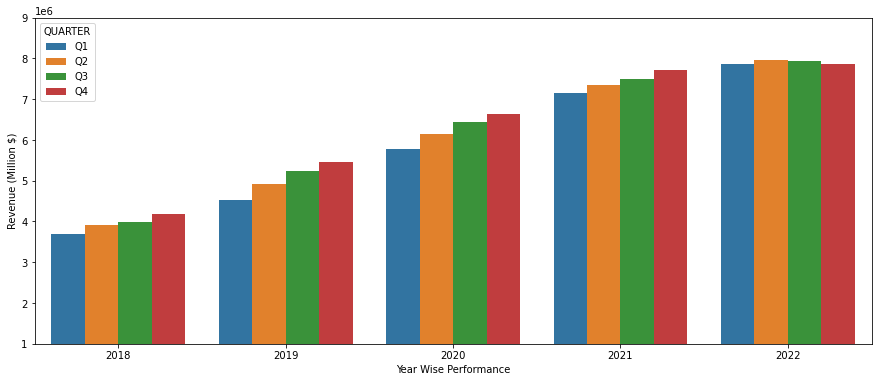

In [52]:
# Year wise and Quarter wise performance
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x = 'YEARS', y = 'REVENUE', hue = 'QUARTER', data = master_netflix_revenue_expenditure)
ax.set(xlabel='Year Wise Performance', ylabel='Revenue (Million $)')
ax.set_ylim(1000000, 9000000)

## It shows that there is a constant increase in revenue for each quarters in all years except 2022 where the Q3 and Q4 performance is falling from 7.97 million dollars in Q2 to 7.92 and 7.85 million dollars in last 2 quarters

### How much Marketing expenses is helping NETFLIX generate profits ? If not marketing which other investments are helping NETFLIX generate profits

In [55]:
marketing_exp_profits_corr = np.corrcoef(summary_revenue_expenditure['MARKETING_EXP_USD'],summary_revenue_expenditure['PROFITS_USD'] )
tech_dev_exp_profits_corr = np.corrcoef(summary_revenue_expenditure['TECH_DEV_COST_USD'],summary_revenue_expenditure['PROFITS_USD'] )
admin_exp_profits_corr = np.corrcoef(summary_revenue_expenditure['ADMIN_EXP_USD'],summary_revenue_expenditure['PROFITS_USD'] )

In [56]:
print("Marketing Expenses Correlation With Profits is ",marketing_exp_profits_corr )
print("Tech and Dev Expenses Correlation With Profits is ",tech_dev_exp_profits_corr )
print("Admin Expenses Correlation With Profits is ",admin_exp_profits_corr )

Marketing Expenses Correlation With Profits is  [[1.        0.2530513]
 [0.2530513 1.       ]]
Tech and Dev Expenses Correlation With Profits is  [[1.         0.91975501]
 [0.91975501 1.        ]]
Admin Expenses Correlation With Profits is  [[1.         0.92914573]
 [0.92914573 1.        ]]


In [45]:
corr_matrix = summary_revenue_expenditure.corr()
corr_matrix

,YEARS,TOTAL_REVENUE_USD,TOTAL_COST_OF_REVENUE_USD,MARKETING_EXP_USD,TECH_DEV_COST_USD,ADMIN_EXP_USD,PROFITS_USD,APAC_REVENUE_USD,APAC_SUBSCRIBERS_ADDITION,APAC_TOTAL_SUBSCRIBERS_AT_END_OF_PERIOD,...,EMEA_REVENUE_USD,EMEA_SUBSCRIBERS_ADDITION,EMEA_TOTAL_SUBSCRIBERS_AT_END_OF_PERIOD,EMEA_AVG_PAYING_MEMBERS,EMEA_AVG_REV_PER_MEMBER_USD,UCAN_REVENUE_USD,UCAN_SUBSCRIBERS_ADDITION,UCAN_TOTAL_SUBSCRIBERS_AT_END_OF_PERIOD,UCAN_AVG_PAYING_MEMBERS,UCAN_AVG_REV_PER_MEMBER_USD
YEARS,1.000000,0.991480,0.996546,0.203851,0.995399,0.997431,0.926830,0.989203,0.327450,0.997188,...,0.971741,-0.772666,0.975014,0.980342,0.720136,0.997229,-0.806519,0.928315,0.944785,0.996368
TOTAL_REVENUE_USD,0.991480,1.000000,0.997104,0.178876,0.977941,0.988310,0.955519,0.997101,0.412977,0.992047,...,0.994032,-0.720804,0.992007,0.995071,0.780288,0.996549,-0.767637,0.963457,0.975417,0.981760
TOTAL_COST_OF_REVENUE_USD,0.996546,0.997104,1.000000,0.160671,0.984196,0.991799,0.932182,0.992858,0.403325,0.996179,...,0.984967,-0.723960,0.989935,0.993162,0.735435,0.998318,-0.766533,0.955628,0.967871,0.988297
MARKETING_EXP_USD,0.203851,0.178876,0.160671,1.000000,0.249782,0.272206,0.253051,0.156221,-0.463650,0.141055,...,0.134998,-0.379737,0.110297,0.121436,0.121542,0.217531,-0.714601,0.046647,0.097321,0.276376
TECH_DEV_COST_USD,0.995399,0.977941,0.984196,0.249782,1.000000,0.995110,0.919755,0.979193,0.235793,0.990748,...,0.951000,-0.827320,0.949967,0.957844,0.710358,0.987445,-0.844889,0.889937,0.911029,0.996187
ADMIN_EXP_USD,0.997431,0.988310,0.991799,0.272206,0.995110,1.000000,0.929146,0.983598,0.298678,0.989876,...,0.966431,-0.778710,0.968616,0.974309,0.715668,0.996592,-0.841602,0.919776,0.939237,0.999036
PROFITS_USD,0.926830,0.955519,0.932182,0.253051,0.919755,0.929146,1.000000,0.964974,0.333412,0.932464,...,0.966656,-0.748784,0.931391,0.936863,0.920720,0.936407,-0.765341,0.910814,0.925056,0.913362
APAC_REVENUE_USD,0.989203,0.997101,0.992858,0.156221,0.979193,0.983598,0.964974,1.000000,0.382898,0.993751,...,0.992086,-0.753121,0.983527,0.987952,0.808145,0.990802,-0.762442,0.951243,0.963388,0.976494
APAC_SUBSCRIBERS_ADDITION,0.327450,0.412977,0.403325,-0.463650,0.235793,0.298678,0.333412,0.382898,1.000000,0.350873,...,0.480470,0.306770,0.521026,0.497929,0.317539,0.374040,0.182273,0.638561,0.595382,0.276981
APAC_TOTAL_SUBSCRIBERS_AT_END_OF_PERIOD,0.997188,0.992047,0.996179,0.141055,0.990748,0.989876,0.932464,0.993751,0.350873,1.000000,...,0.976832,-0.770244,0.977209,0.982399,0.744415,0.993104,-0.770558,0.933998,0.947544,0.987492


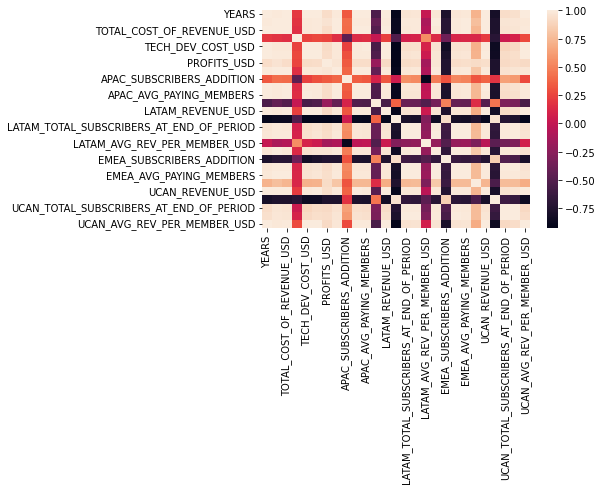

In [66]:
figsize=(20, 6)
sns.heatmap(corr_matrix)
plt.show()

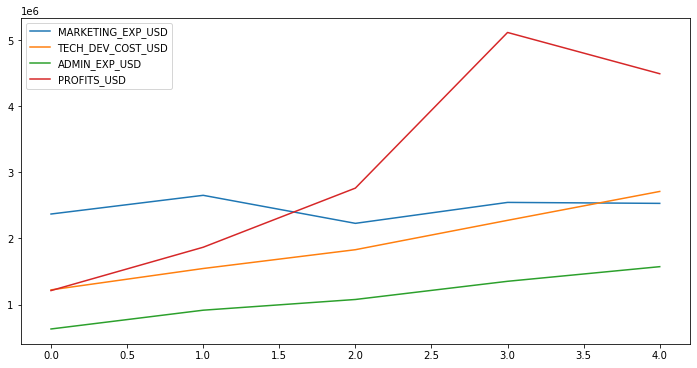

In [57]:
# Profits AND Expenditure
summary_revenue_expenditure[['MARKETING_EXP_USD', 'TECH_DEV_COST_USD', 'ADMIN_EXP_USD','PROFITS_USD']].plot(subplots = False, figsize = (12,6))
plt.show()

## The graphs and figure shows the expenses and their correlation with the profits. More NETFLIX is investing in Technology and Development and Administrative or operations it is able to Generate More Profits. 

## Marketing Expenses Correlation with Profits is 0.25
## Tech and Development Correlation with Profits is 0.92
## Admin Expenses Correlation with Profits is 0.93

## But it clearly shows that company is trying to reduce its marketing expenses to a good extent and in last quarter of 2022 it has started getting impact in profits. 

## NETFLIX should start investing more in marketing so that it can increase its profits

### Subscribers Region Wise of Netflix from 2018 till 2022

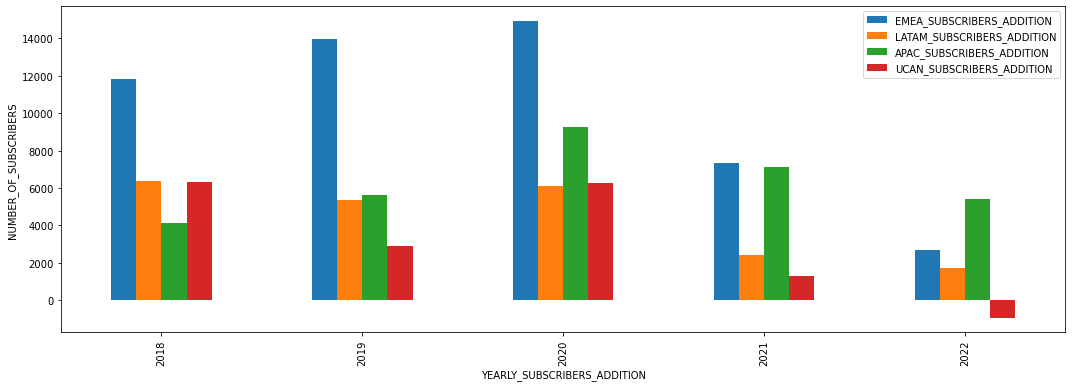

In [39]:
# New Subscribers Addition Region Wise 
summary_revenue_expenditure.plot('YEARS', ['EMEA_SUBSCRIBERS_ADDITION', 'LATAM_SUBSCRIBERS_ADDITION', 'APAC_SUBSCRIBERS_ADDITION','UCAN_SUBSCRIBERS_ADDITION'], kind = 'bar',  figsize = (18,6))
plt.xlabel('YEARLY_SUBSCRIBERS_ADDITION')
plt.ylabel('NUMBER_OF_SUBSCRIBERS')
plt.show()

## This Clearly shows that subscribers at the end of the year 2022 has been in negative i.e. subscribers are leaving NETFLIX services in UCAN which is United States and Cannada. Marketing Campaigns have to be launched there to retain and gain new subscribers

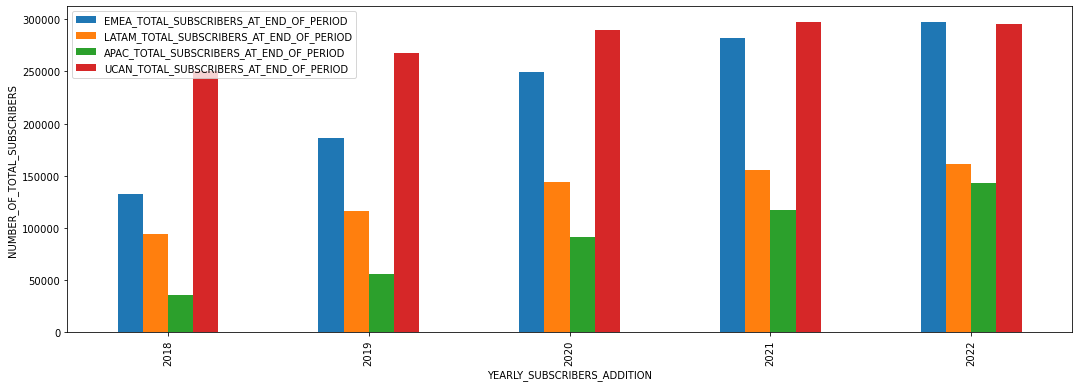

In [41]:
# Overall Total Subscribers Region Wise
summary_revenue_expenditure.plot('YEARS', ['EMEA_TOTAL_SUBSCRIBERS_AT_END_OF_PERIOD', 'LATAM_TOTAL_SUBSCRIBERS_AT_END_OF_PERIOD', 'APAC_TOTAL_SUBSCRIBERS_AT_END_OF_PERIOD','UCAN_TOTAL_SUBSCRIBERS_AT_END_OF_PERIOD'], kind = 'bar',  figsize = (18,6))
plt.xlabel('YEARLY_SUBSCRIBERS_ADDITION')
plt.ylabel('NUMBER_OF_TOTAL_SUBSCRIBERS')
plt.show()

## Overall Subscribers have been growing across all the regions but the total subscribers is not growing in UCAN i.e. United States and Cannada. These market has to given more focus as subscribers have decreased from 297574	 in 2021 to 295545 in 2022 i.e. 2029 subscribers have left subscribing NETFLIX.

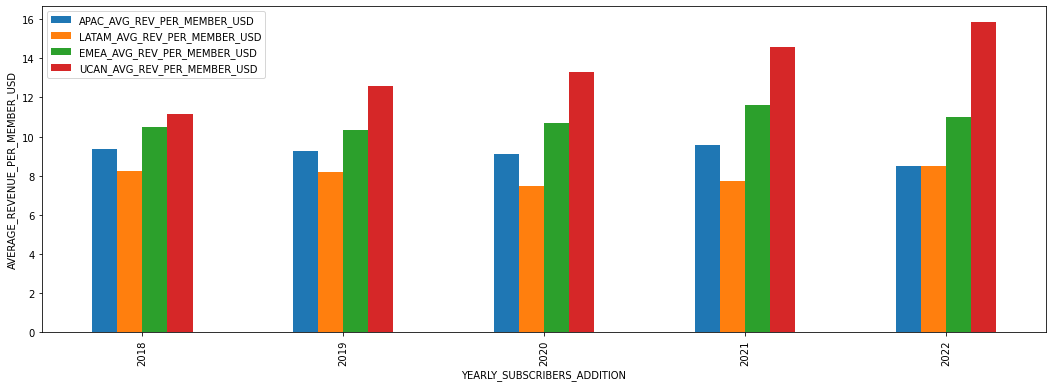

In [47]:
# Average Revenue Per Subscribers Region Wise
summary_revenue_expenditure.plot('YEARS', ['APAC_AVG_REV_PER_MEMBER_USD', 'LATAM_AVG_REV_PER_MEMBER_USD', 'EMEA_AVG_REV_PER_MEMBER_USD','UCAN_AVG_REV_PER_MEMBER_USD'], kind = 'bar',  figsize = (18,6))
plt.xlabel('YEARLY_SUBSCRIBERS_ADDITION')
plt.ylabel('AVERAGE_REVENUE_PER_MEMBER_USD')
plt.show()

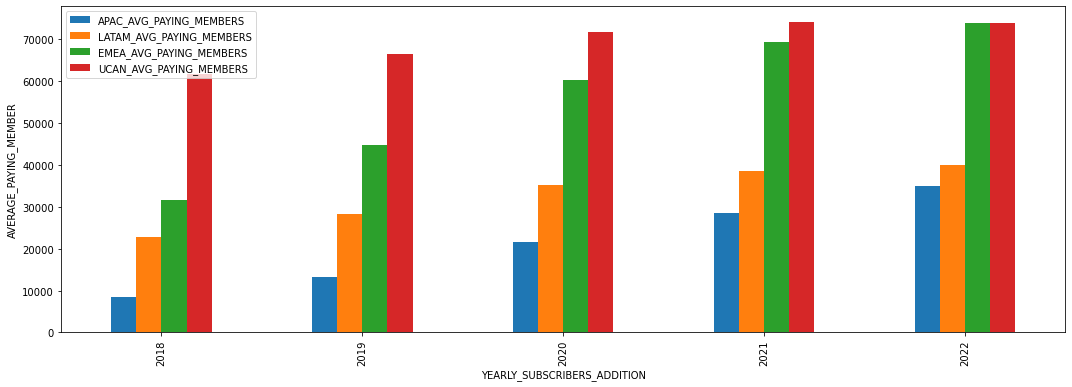

In [48]:
# Average Paying Subscribers Region Wise
summary_revenue_expenditure.plot('YEARS', ['APAC_AVG_PAYING_MEMBERS', 'LATAM_AVG_PAYING_MEMBERS', 'EMEA_AVG_PAYING_MEMBERS','UCAN_AVG_PAYING_MEMBERS'], kind = 'bar',  figsize = (18,6))
plt.xlabel('YEARLY_SUBSCRIBERS_ADDITION')
plt.ylabel('AVERAGE_PAYING_MEMBER')
plt.show()

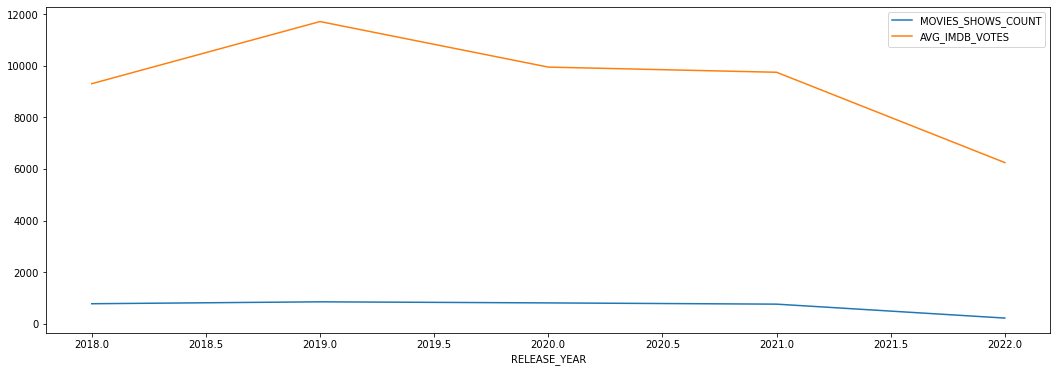

In [32]:
netflix_data_movies_shows.plot(x = 'RELEASE_YEAR', y = ['MOVIES_SHOWS_COUNT', 'AVG_IMDB_VOTES'] , kind = 'line', figsize = (18,6))
plt.show()

## The movies released and votes received for ratings in 2022 is less as compared to other years. It is observed that the movie and show release has been decreasing from 2020 till 2022 which can also be the reason why subsribers in United States and Cannada are leaving.

### Action Steps:

## 1. NETFLIX has to invest in Marketing in first quarter of 2023 and target UCAN region

## 2. More number of movies and shows needs to be released on NETFLIX

## 3. Special offers needs to be given to subscribers to retain them especially when recession is near corner and has started affecting the markets

## 4. To Tackle this Admin Expenses can be cut down as these funds can be utilised in Marketing in UCAN
